Image opened with pillow and converted to CMYK
Image shape:  (7300, 6908)


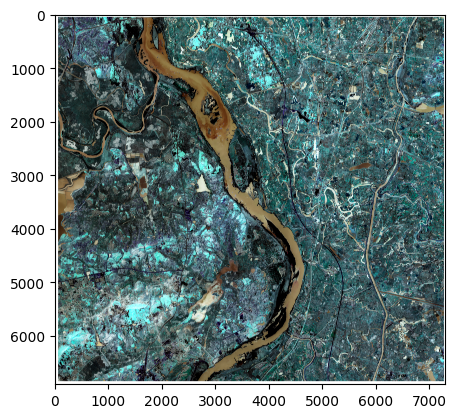

In [3]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

# 8-bit: Nir, R, G, B.
image_8bit_path = "/home/pablo.canosa/wip/datasets/split_gaofen/train_8bit/GF2_PMS1__L1A0000564539-MSS1.tif"

print("Image opened with pillow and converted to CMYK")
image8bits = Image.open(image_8bit_path).convert('CMYK')
print("Image shape: ", image8bits.size)

plt.imshow(image8bits)
plt.show()

In [10]:
# Gardar bandas en PNGs
for band in image8bits.getbands():
    print("Max ", np.max(np.array(image8bits.getchannel(band))))
    print("Min ", np.min(np.array(image8bits.getchannel(band))))
    #image8bits.getchannel(band).save(f"/tmp/8bit_{band}.png")

Max  255
Min  0
Max  255
Min  0
Max  255
Min  0
Max  255
Min  0


In [20]:
# Creamos un array 3D coas bandas
def save_raw(image, filename):
	sizes = np.zeros((3), dtype=np.int32)

	sizes[0] = image.shape[2]; #print(H)
	sizes[1] = image.shape[1]; #print(V)
	sizes[2] = image.shape[0]; #print(B)

	image_raw = np.concatenate([sizes, image.flatten()]).astype(np.int32)
	
	
	newFile = open(filename, "wb")
	image_raw.tofile(newFile, format="%d")
	newFile.close()



In [18]:
B = 4
multi = np.zeros((B, image8bits.size[1], image8bits.size[0]))

for i in range (0, B):
    multi[i,:,:] = np.array(image8bits.getchannel(i))

In [22]:
img = save_raw(multi, "/home/pablo.canosa/trials/8bit.rawb")


print("image shape: ",np.moveaxis(multi, 0, -1).shape)

image shape:  (6908, 7300, 4)


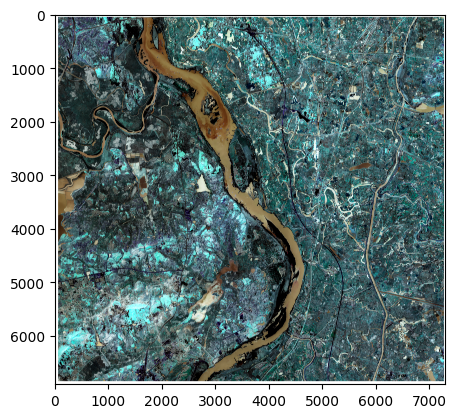

In [9]:
plt.imshow(image8bits)
plt.show()

# Create Datasets

In [101]:
import os

def divide_image_into_quadrants(image, n):
    
    if(len(image.shape) == 3):
        rows, cols, _ = image.shape  
    else:
        rows, cols = image.shape  
    
    
    # Calculate the number of rows and columns for the grid
    num_rows = int(n ** 0.5)
    num_cols = n // num_rows
    
    # Calculate the dimensions of each quadrant
    quadrant_rows = rows // num_rows
    quadrant_cols = cols // num_cols
    
    # Initialize a list to store the quadrants
    quadrants = []
    
    # Iterate over the rows and columns to extract each quadrant
    for i in range(num_rows):
        for j in range(num_cols):
            # Define the region of interest (ROI) for the quadrant
            start_row = i * quadrant_rows
            end_row = start_row + quadrant_rows
            start_col = j * quadrant_cols
            end_col = start_col + quadrant_cols
            
            # Extract the quadrant
            quadrant = image[start_row:end_row, start_col:end_col]
            quadrants.append(quadrant)
    
    return quadrants

def process_8bit_images(path_8bit_source, path_8bit_destiny):
    
    for number,image_name in enumerate(os.listdir(path_8bit_source)):
        print(f"{path_8bit_source}{image_name}")
        image8bits = Image.open(f"{path_8bit_source}{image_name}").convert('CMYK')
        B = 4
        multi = np.zeros((B, image8bits.size[1], image8bits.size[0]))

        for i in range (0, B):
            multi[i,:,:] = np.array(image8bits.getchannel(i))


        
        image_raw = np.moveaxis(multi, 0, -1)

        quadrants = divide_image_into_quadrants(image_raw, 4)


        for idx,q in enumerate(quadrants):
            # Save the quadrant to a file   
            print(f"Saving image {image_name[:-4]}_{idx} with shape {q.shape}")
            newFile = open(f"{path_8bit_destiny}{os.path.splitext(image_name)[0]}_{idx}.rawb", "wb")
            q.tofile(newFile, format="%d")
            newFile.close()

        
        print(number)        

        """
        img = save_raw(multi, "/home/pablo.canosa/trials/8bit.rawb")
        print("image shape: ",np.moveaxis(multi, 0, -1).shape)

        plt.imshow(image8bits)
        plt.show()
        """

In [103]:
path_8bit_train = "//home/pablo.canosa/wip/datasets/split_gaofen/train_8bit/" 
path_8bit_train_destiny = "/home/pablo.canosa/wip/datasets/small_gaofen/train/8bit_rawb/"
process_8bit_images(path_8bit_train, path_8bit_train_destiny)

//home/pablo.canosa/wip/datasets/split_gaofen/train_8bit/GF2_PMS1__L1A0001094941-MSS1.tif
Saving image GF2_PMS1__L1A0001094941-MSS1_0 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001094941-MSS1_1 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001094941-MSS1_2 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001094941-MSS1_3 with shape (3454, 3650, 4)
0
//home/pablo.canosa/wip/datasets/split_gaofen/train_8bit/GF2_PMS2__L1A0001537637-MSS2.tif
Saving image GF2_PMS2__L1A0001537637-MSS2_0 with shape (3454, 3650, 4)
Saving image GF2_PMS2__L1A0001537637-MSS2_1 with shape (3454, 3650, 4)
Saving image GF2_PMS2__L1A0001537637-MSS2_2 with shape (3454, 3650, 4)
Saving image GF2_PMS2__L1A0001537637-MSS2_3 with shape (3454, 3650, 4)
1
//home/pablo.canosa/wip/datasets/split_gaofen/train_8bit/GF2_PMS2__L1A0001251800-MSS2.tif
Saving image GF2_PMS2__L1A0001251800-MSS2_0 with shape (3454, 3650, 4)
Saving image GF2_PMS2__L1A0001251800-MSS2_1 with shape (3454, 3650, 4)
Saving image GF2

In [104]:
path_8bit_test = "/home/pablo.canosa/wip/datasets/split_gaofen/test_8bit/"
path_8bit_test_destiny = "/home/pablo.canosa/wip/datasets/small_gaofen/test/test_8bit_rawb/"
process_8bit_images(path_8bit_test, path_8bit_test_destiny)

/home/pablo.canosa/wip/datasets/split_gaofen/test_8bit/GF2_PMS1__L1A0001765574-MSS1.tif
Saving image GF2_PMS1__L1A0001765574-MSS1_0 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001765574-MSS1_1 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001765574-MSS1_2 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001765574-MSS1_3 with shape (3454, 3650, 4)
0
/home/pablo.canosa/wip/datasets/split_gaofen/test_8bit/GF2_PMS1__L1A0001680858-MSS1.tif
Saving image GF2_PMS1__L1A0001680858-MSS1_0 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001680858-MSS1_1 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001680858-MSS1_2 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001680858-MSS1_3 with shape (3454, 3650, 4)
1
/home/pablo.canosa/wip/datasets/split_gaofen/test_8bit/GF2_PMS1__L1A0001680857-MSS1.tif
Saving image GF2_PMS1__L1A0001680857-MSS1_0 with shape (3454, 3650, 4)
Saving image GF2_PMS1__L1A0001680857-MSS1_1 with shape (3454, 3650, 4)
Saving image GF2_PMS1_

(3454, 3650, 4)


<function matplotlib.pyplot.show(close=None, block=None)>

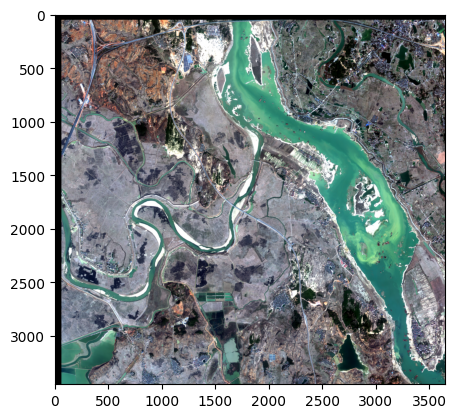

In [6]:
import numpy as np
import matplotlib.pyplot as plt

image_path = "/home/pablo.canosa/wip/datasets/small_gaofen/train/8bit_rawb/GF2_PMS1__L1A0000564539-MSS1_0.rawb"
with open(image_path, 'rb') as file:
    img = file.read()
file.close()
#close the file

img = np.frombuffer(img, dtype=np.float64)

img = img.reshape((3454, 3650, 4))

# cast to uint8
img = img.astype(np.uint8)
print(img.shape)


plt.imshow(img[:,:,1:4])
plt.show




130.27402376438673
0
255


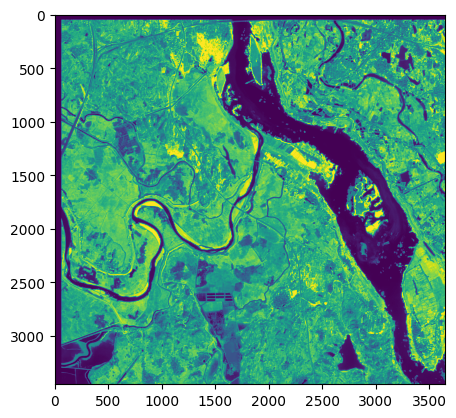

In [10]:

plt.imshow(img[:,:,0])
plt.show
print(np.mean(img[:,:,0]))
print(np.min(img[:,:,0]))
print(np.max(img[:,:,0]))

# Ahora tengo que calcular las medias de los pixeles 

In [12]:
import os
from tqdm.notebook import tqdm
for i in tqdm(range(100)):
    sleep(3)

bandNIRmean = []
bandRmean = []
bandGmean = []
bandBmean = []

bandNIR_STD= []
bandR_STD = []
bandG_STD = []
bandB_STD = []

for number,image_name in tqdm(enumerate(os.listdir("/home/pablo.canosa/wip/datasets/small_gaofen/train/8bit_rawb/"))):
        path = f"/home/pablo.canosa/wip/datasets/small_gaofen/train/8bit_rawb/{image_name}"
        with open(image_path, 'rb') as file:
                img = file.read()
        file.close()
        #close the file

        img = np.frombuffer(img, dtype=np.float64)

        img = img.reshape((3454, 3650, 4))

        # cast to uint8
        img = img.astype(np.uint8)

        bandNIRmean.append(np.mean(img[:,:,0]))
        bandRmean.append(np.mean(img[:,:,1]))
        bandGmean.append(np.mean(img[:,:,2]))
        bandBmean.append(np.mean(img[:,:,3]))


        bandNIR_STD.append(np.std(img[:,:,0]))
        bandR_STD.append(np.std(img[:,:,1]))
        bandG_STD.append(np.std(img[:,:,2]))
        bandB_STD.append(np.std(img[:,:,3]))
        
        print(number)        

PIXEL_MEANS = [np.mean(bandNIRmean), np.mean(bandRmean), np.mean(bandGmean), np.mean(bandBmean)]
PIXEL_STDS = [np.mean(bandNIR_STD), np.mean(bandR_STD), np.mean(bandG_STD), np.mean(bandB_STD)]

print("PIXEL_MEANS ", PIXEL_MEANS)
print("PIXEL_STDS ", PIXEL_STDS)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27